# Valkyrie Data Access



The Valkyrie project provides web services for ordering spatially and temporally subsetted Lidar point cloud data from the BLATM L1B, ILATM L1B Version 1, ILATM L1B Version 2 and the ILVIS2 data products. The following table describes the temporal and spatial coverage of each of these dataset as well as the sensor and platform used to acquire the data.


---

|              | Spatial Coverage                                                      | Temporal Coverage                              | Platform                                              | Sensor                   |
|--------------|-----------------------------------------------------------------------|------------------------------------------------|-------------------------------------------------------|--------------------------|
| BLATM L1B    | South: N:-53, S: -90, E:180, W:-180 North: N:90, S: 60, E:180, W:-180 | 23 June 1993 - 30 October 2008                 | DC-8, DHC-6, P-3A ORION, P-3B                         | ATM                      |
| ILATM L1B V1 | South: N:-53, S: -90, E:180, W:-180 North: N:90, S: 60, E:180, W:-180 | 31 March 2009 - 8 November 2012 (updated 2013) | AIRCRAFT, DC-8, P-3B                                  | ATM                      |
| ILATM L1B V2 | South: N:-53, S: -90, E:180, W:-180 North: N:90, S: 60, E:180, W:-180 | 20 March 2013 - 16 May 2019 (updated 2020)     | C-130, DC-8, HU-25A, HU-25C, P-3B, WP-3D ORION        | ATM                      |
| ILVIS2       | North: N:90, S: 60, E:180, W:-180                                     | 25 August 2017 - 20 September 2017             | AIRCRAFT, B-200, C-130, DC-8, G-V, HU-25C, P-3B, RQ-4 | ALTIMETERS, LASERS, LVIS |
| GLAH06       | Global: N:86, S: -86, E:180, W:-180                                     |     20 February 2003 - 11 October 2009        | IceSat | ALTIMETERS, CD, GLAS, GPS, GPS Receiver, LA, PC


--- 

> Note: If you have any qustions about the data please contact NSIDC user services at users@nsidc.org

In this tutorial we are going to use iPyLeaflet and other Jupyter widgets to select our constraints and put a data request to our Valkyrie API.

First to get you familiarized with the combined coverage of these products run the next cell and play the Youtube video.




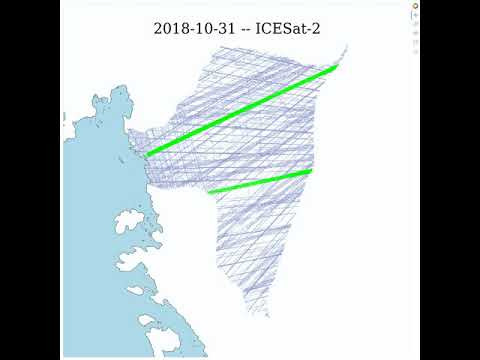

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('jRB1OEDXXwY')

In [ ]:
import ipywidgets as widgets
r = widgets.Dropdown(
    options=['south', 'north'],
    description='Hemisphere:',
    disabled=False,
)
# Now let's pick up an hemisphere
display(r)

In [ ]:
# The UI is encapsulated in this helper file, 
# if you see controls repeated try running the cell again: https://github.com/ipython-contrib/jupyter_contrib_nbextensions/issues/1056
import valkyrie_utils as vu
from ipyleaflet import (
    Map,
    Polygon,
    DrawControl
)

dc = DrawControl(circlemarker={},
                 polyline={},
                 polygon={},
                 rectangle = {
                    "shapeOptions": {
                        "fillColor": "#fca45d",
                        "color": "#fca45d",
                        "fillOpacity": 0.5
                    }
})
h = vu.hemisphere[r.value]
base_map = Map(
        center=h['center'],
        zoom=1,
        basemap=h['base_map'],
        crs=h['projection'])
base_map.add_control(dc)
display(vu.dataset, vu.ITRF, vu.date_range_slider, base_map)

### Now that we have a dataset selected and we are contraining our search using a temporal range and polygon we can call the Valkyrie API

> Note: Valkyrie uses Hermes, NSIDC's data ordering system.

In [ ]:
# Some reference dates for ATM missions are Aug-Dec 2014 in the Antarctic peninsula.
params = vu.build_params(dc)
print(vu.dataset.value, params,)

## Sending a data order

Now that we have our constraints we just need to post our order and wait for Valkyrie to fulfill it

In [ ]:
import requests
base_url = f'http://staging.valkyrie-vm.apps.nsidc.org/1.0/{vu.dataset.value}'
response = requests.post(base_url, params=params)
# now we are going to print the response from Valkyrie
status_url = response.json()['status_url']
print(status_url, response)

## Downloading the data
Let's get some coffee, some Valkyrie orders are in the Gigabytes real amd may take a little while to be processed. 
Once that your status URL says is completed we can grab the HDF5 data file using the URL on the same response!

In [ ]:
order_status = requests.get(status_url).json()
print(order_status)